In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

df = pd.read_csv("Chocolate_Sales.csv")
df.head()




,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [11]:
# Dataset structure
df.info()

# Missing values count
print("\nMissing values:\n", df.isna().sum())

# Missing values percentage
print("\nMissing %:\n", (df.isna().mean()*100).round(2))

# Duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())

# Shape
print("\nShape:", df.shape)


<class 'pandas.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sales Person   3282 non-null   str  
 1   Country        3282 non-null   str  
 2   Product        3282 non-null   str  
 3   Date           3282 non-null   str  
 4   Amount         3282 non-null   str  
 5   Boxes Shipped  3282 non-null   int64
dtypes: int64(1), str(5)
memory usage: 154.0 KB

Missing values:
 Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

Missing %:
 Sales Person     0.0
Country          0.0
Product          0.0
Date             0.0
Amount           0.0
Boxes Shipped    0.0
dtype: float64

Duplicate rows: 0

Shape: (3282, 6)


In [12]:
# Fix Date
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Fix Amount (remove $ and commas)
df['Amount'] = df['Amount'].replace(r'[\$,]', '', regex=True).astype(float)

# Remove bad rows if any
df = df.dropna(subset=['Date'])

df.dtypes


Sales Person                str
Country                     str
Product                     str
Date             datetime64[us]
Amount                  float64
Boxes Shipped             int64
dtype: object

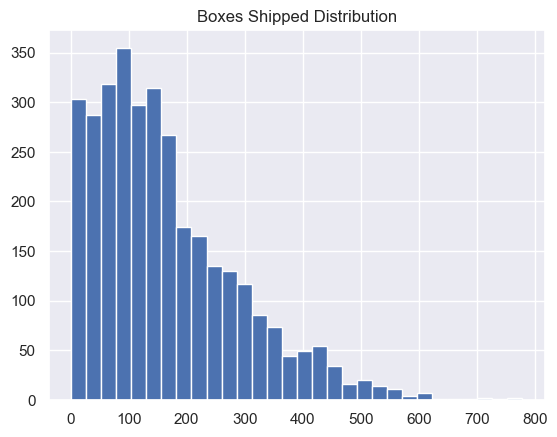

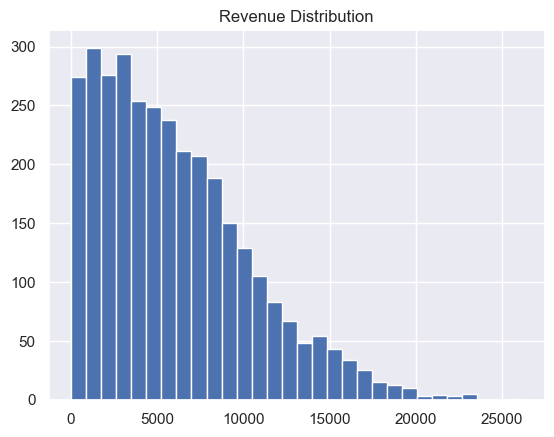

In [13]:
df.describe()

# Boxes shipped distribution
plt.figure()
plt.hist(df['Boxes Shipped'], bins=30)
plt.title("Boxes Shipped Distribution")
plt.show()

# Revenue distribution
plt.figure()
plt.hist(df['Amount'], bins=30)
plt.title("Revenue Distribution")
plt.show()


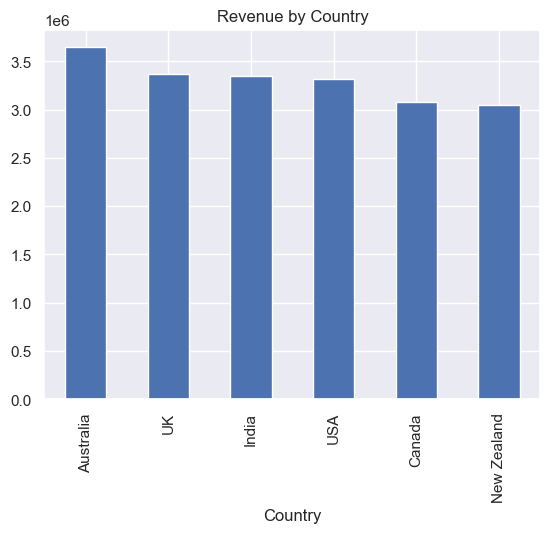

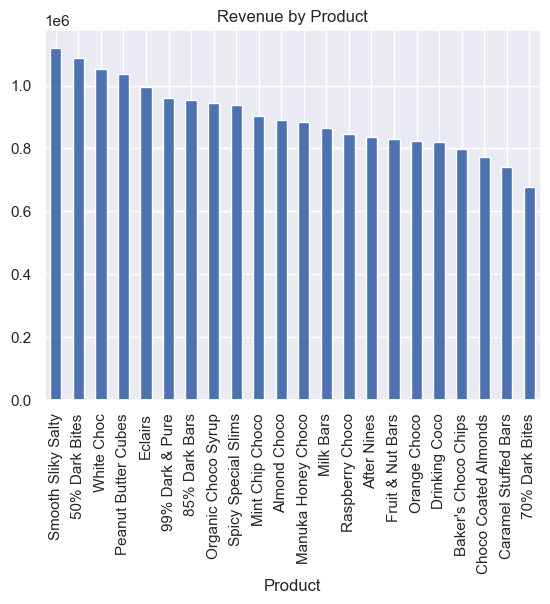

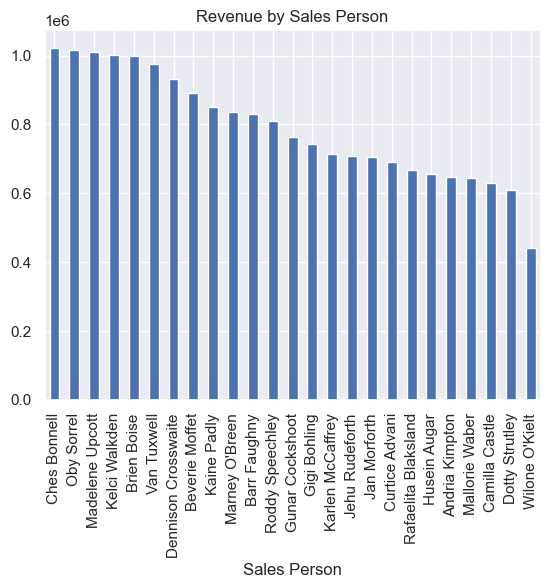

Sales Person
Ches Bonnell           1022599.96
Oby Sorrel             1017204.12
Madelene Upcott        1010028.72
Kelci Walkden          1002929.10
Brien Boise             997326.48
Van Tuxwell             974425.09
Dennison Crosswaite     931849.57
Beverie Moffet          892421.37
Kaine Padly             849062.76
Marney O'Breen          836427.63
Name: Amount, dtype: float64

In [14]:
# Revenue by Country
country_rev = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
country_rev.plot(kind='bar', title="Revenue by Country")
plt.show()

# Revenue by Product
product_rev = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)
product_rev.plot(kind='bar', title="Revenue by Product")
plt.show()

# Revenue by Sales Person
sales_rev = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)
sales_rev.plot(kind='bar', title="Revenue by Sales Person")
plt.show()

sales_rev.head(10)


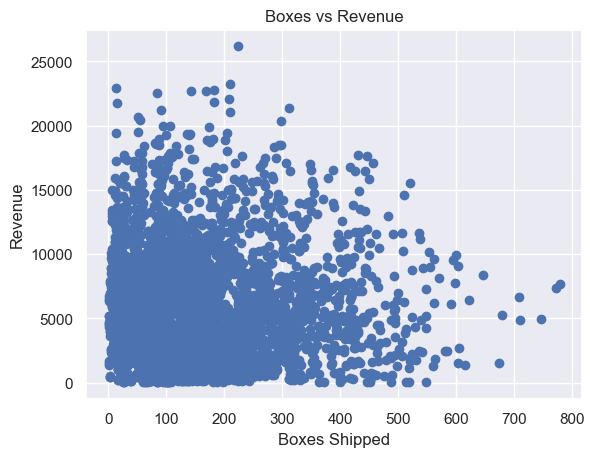

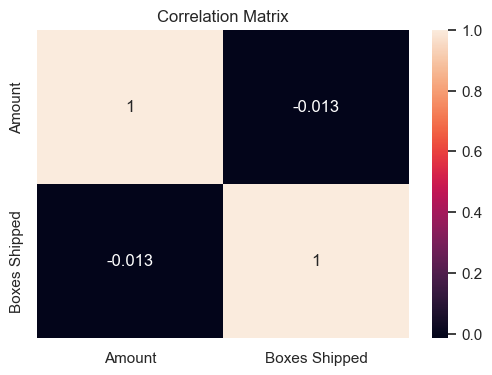

In [15]:
# Scatter plot
plt.figure()
plt.scatter(df['Boxes Shipped'], df['Amount'])
plt.xlabel("Boxes Shipped")
plt.ylabel("Revenue")
plt.title("Boxes vs Revenue")
plt.show()

# Correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


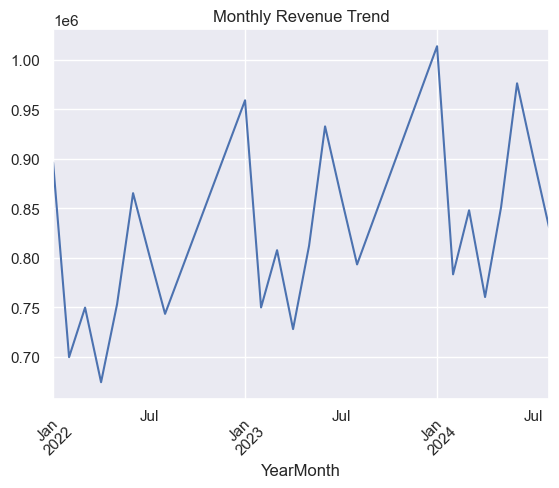

In [16]:
df['YearMonth'] = df['Date'].dt.to_period('M')

monthly_rev = df.groupby('YearMonth')['Amount'].sum()

monthly_rev.plot(title="Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.show()


In [17]:
import os
os.getcwd()


'c:\\Users\\kidst\\Desktop\\ChocolateLab'